### Seaborn - Categorical Data Plots
 - catplot()


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set(style="ticks")

In [2]:
exercise =  sns.load_dataset("exercise")
exercise.head(10)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
5,5,2,low fat,93,30 min,rest
6,6,3,low fat,97,1 min,rest
7,7,3,low fat,97,15 min,rest
8,8,3,low fat,94,30 min,rest
9,9,4,low fat,80,1 min,rest


In [3]:
exercise.time.unique()

[1 min, 15 min, 30 min]
Categories (3, object): [1 min, 15 min, 30 min]

In [4]:
exercise.kind.unique()

[rest, walking, running]
Categories (3, object): [rest, walking, running]

In [5]:
exercise.diet.unique()

[low fat, no fat]
Categories (2, object): [low fat, no fat]

In [6]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [8]:
tips.time.unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

In [9]:
tips.smoker.unique()

[No, Yes]
Categories (2, object): [No, Yes]

In [10]:
tips.sex.unique()

[Female, Male]
Categories (2, object): [Female, Male]

In [11]:
tips["size"].unique()

array([2, 3, 4, 1, 6, 5])

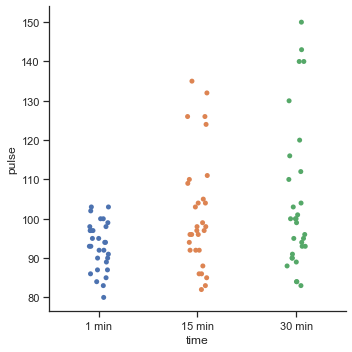

In [12]:
sns.catplot(x="time", y="pulse", data=exercise);

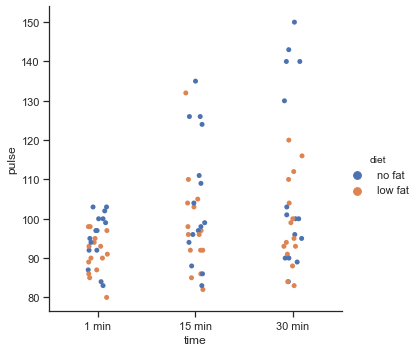

In [13]:
sns.catplot(x="time", y="pulse", hue="diet", data=exercise);

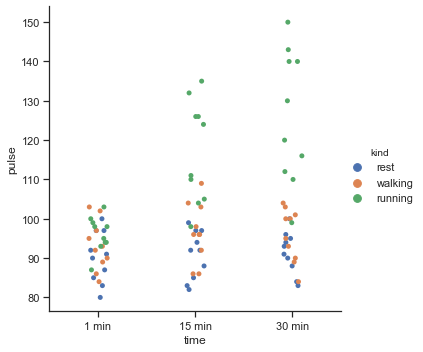

In [14]:
sns.catplot(x="time", y="pulse", hue="kind", data=exercise);

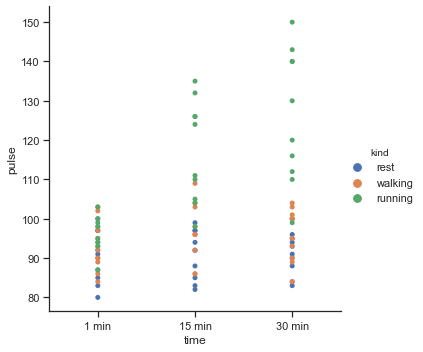

In [15]:
sns.catplot(x="time", y="pulse", hue="kind", jitter=False, data=exercise); # hard to tell if there is overlap

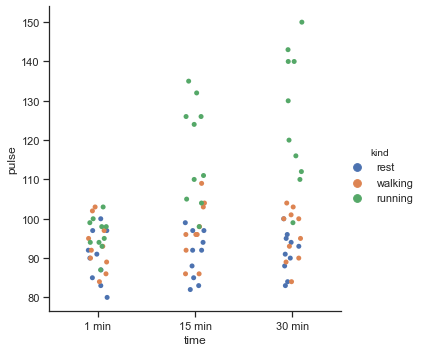

In [16]:
# strip plot is default

sns.catplot(x="time", y="pulse", hue="kind", 
            data=exercise, kind='strip');

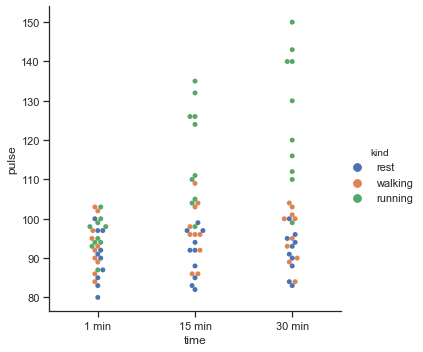

In [17]:
# swarm plot

sns.catplot(x="time", y="pulse", hue="kind", 
            data=exercise, kind='swarm');

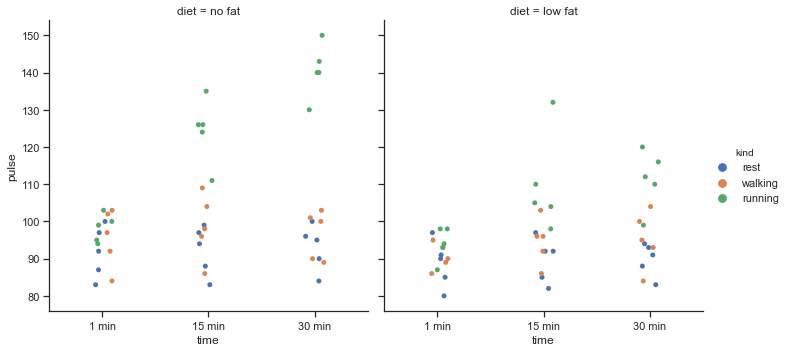

In [18]:
# Facet along the columns to show a third categorical variable


sns.catplot(x="time", y="pulse", hue="kind",
                 col="diet", data=exercise);

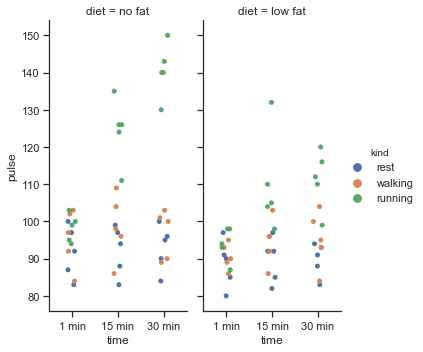

In [19]:
# Use a different height (5 inches default) and aspect ratio (width = height * aspect ratio) for the facets

sns.catplot(x="time", y="pulse", hue="kind",
                 col="diet", data=exercise,
                 height=5, aspect=0.5);

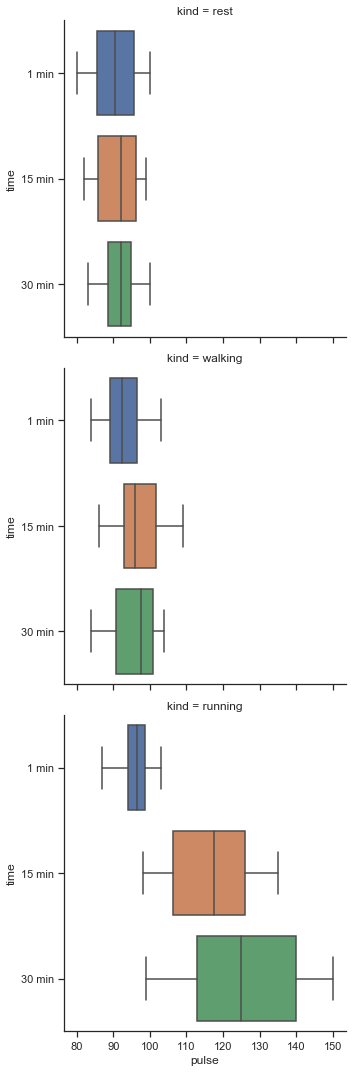

In [20]:
sns.catplot(x="pulse", y="time", row="kind", 
            kind="box", orient="h",
                 data=exercise,
                 height=5, aspect=1);

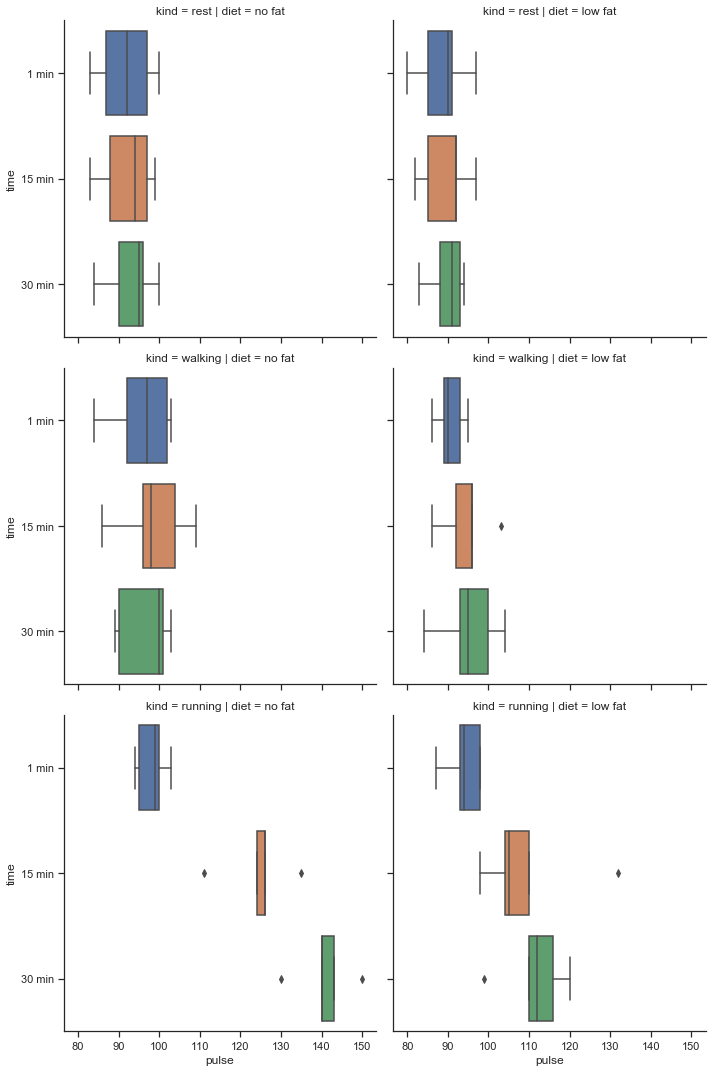

In [21]:
sns.catplot(x="pulse", y="time", row="kind", 
            kind="box", orient="h",
                 col="diet", data=exercise,
                 height=5, aspect=1);

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


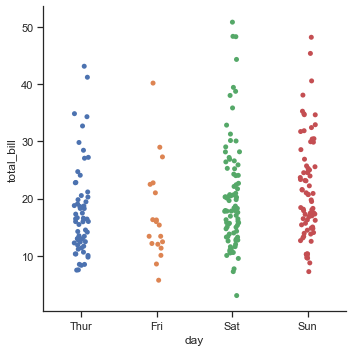

In [23]:
sns.catplot(x="day", y="total_bill", data=tips);

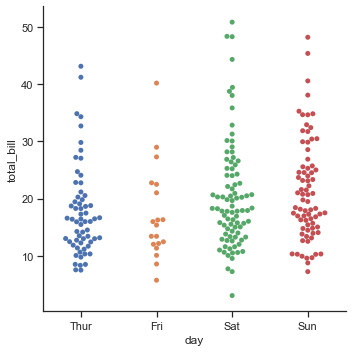

In [24]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

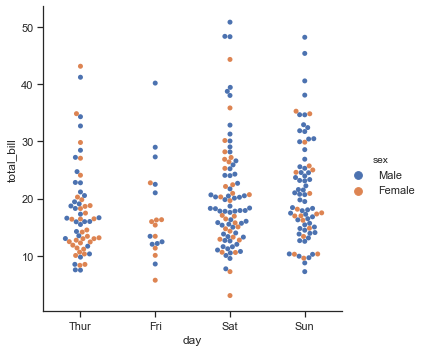

In [25]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

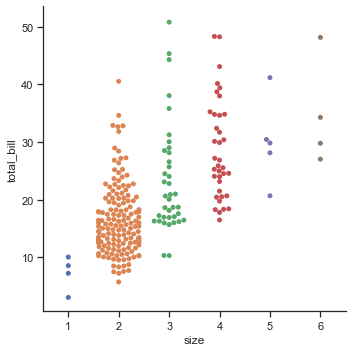

In [26]:
sns.catplot(x="size", y="total_bill", kind="swarm", data=tips);

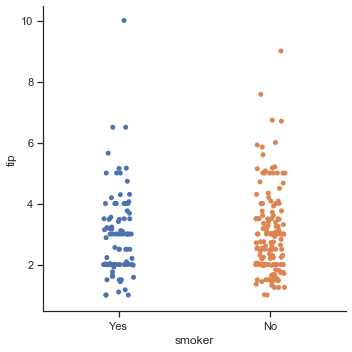

In [27]:
sns.catplot(x="smoker", y="tip", data=tips);

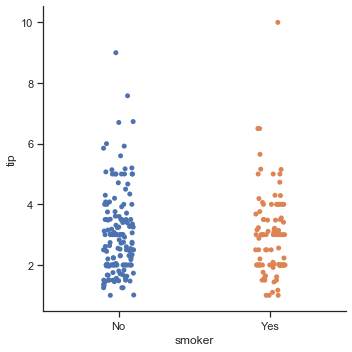

In [28]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

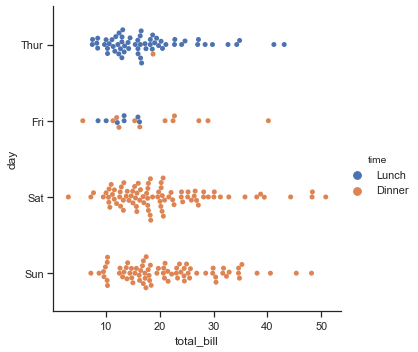

In [29]:
# For many categories, show on y-axis

sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

### Distribution of observations within categories
 - For large datasets, scatter plots can only provide limited information

#### Boxplots

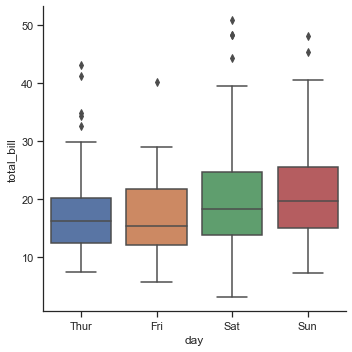

In [30]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

In [31]:
tips.groupby('day')['total_bill'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


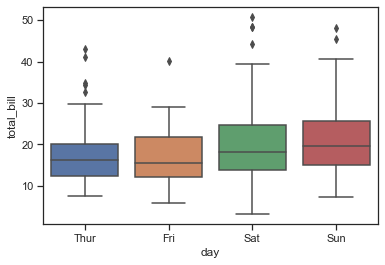

In [32]:
sns.boxplot(x="day", y="total_bill", data=tips);

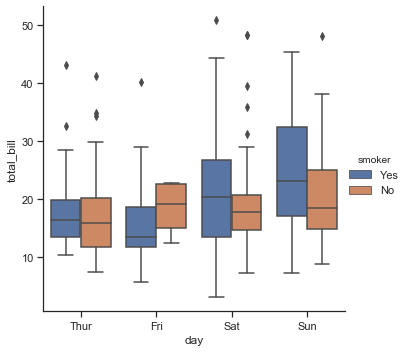

In [33]:
# with hue, the box for each level is moved along the categorical axis (dodging)
# default dodging is true - semantic variable (hue) nested within main categorical variable

sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

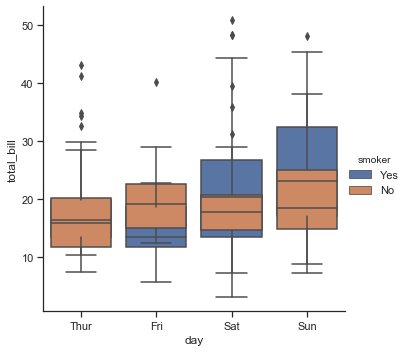

In [34]:
# not useful

sns.catplot(x="day", y="total_bill", hue="smoker", dodge=False,
            kind="box", data=tips);

In [35]:

tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


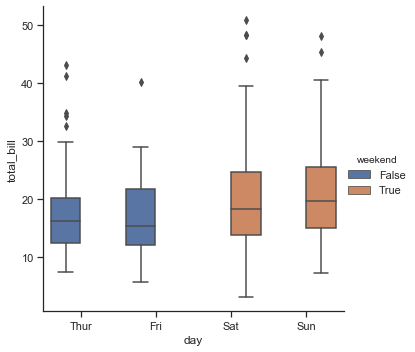

In [36]:
sns.catplot(x="day", y="total_bill", hue="weekend", 
            kind="box", data=tips);

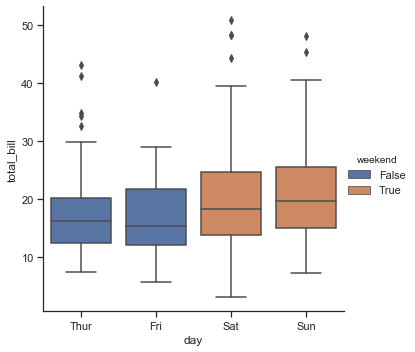

In [37]:
# disable dodging

sns.catplot(x="day", y="total_bill", hue="weekend", dodge=False,
            kind="box", data=tips);

#### Boxen plot (Letter-Value plots)

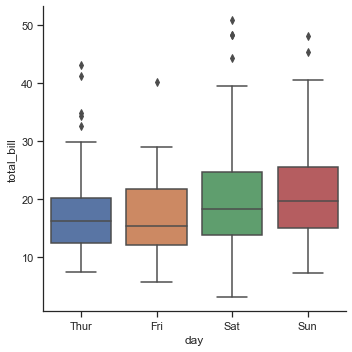

In [38]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

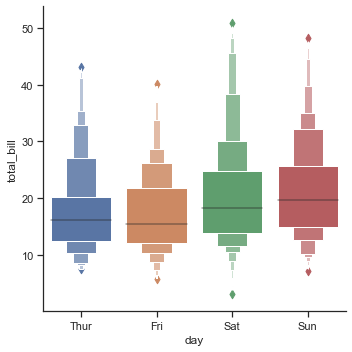

In [39]:
sns.catplot(x="day", y="total_bill", kind="boxen", data=tips);

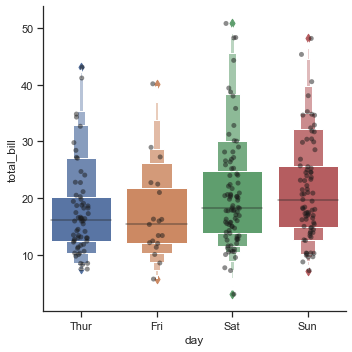

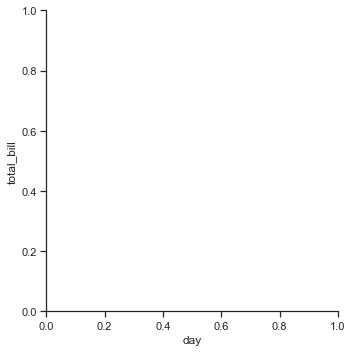

In [40]:
g = sns.catplot(x="day", y="total_bill", kind="boxen", data=tips)

sns.catplot(x="day", y="total_bill", data=tips,
            color="k", alpha=0.5, ax=g.ax);


### Violin Plots
 - combines boxplot with kernel density estimation (KDE)

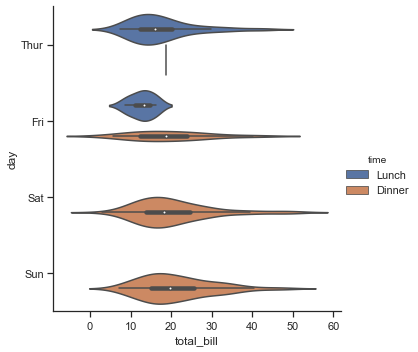

In [41]:
g = sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

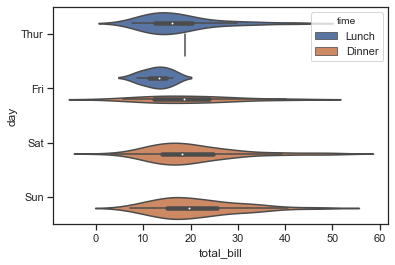

In [42]:
sns.violinplot(x="total_bill", y="day", hue="time",
             data=tips);

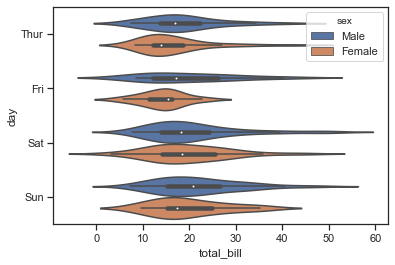

In [43]:
sns.violinplot(x="total_bill", y="day", hue="sex",
             data=tips);

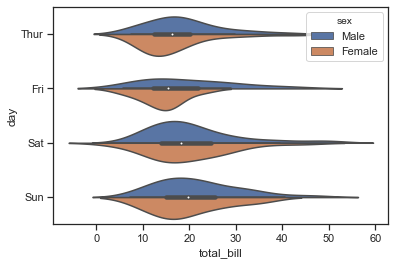

In [44]:
# If the hue has only two-levels, use split for more better plot

sns.violinplot(x="total_bill", y="day", hue="sex",
             split=True, data=tips);

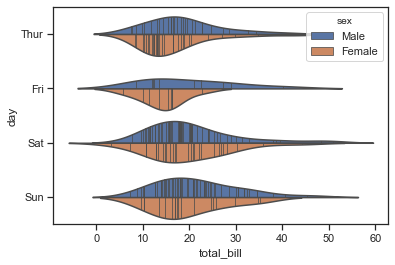

In [45]:
# Show each value inside the violin instead of boxplot

sns.violinplot(x="total_bill", y="day", hue="sex",
             split=True, inner="stick", data=tips);

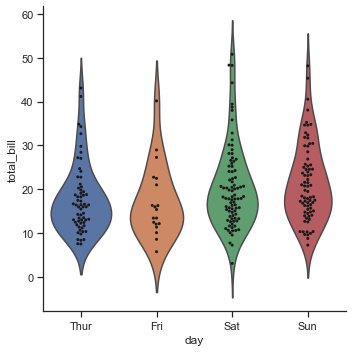

In [46]:
# Show each observation along with a summary of the distrbution

g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)

sns.swarmplot(x="day", y="total_bill", color="k", size = 3, data=tips, ax=g.ax);

### Statistical estimation within categories

#### Bar plots

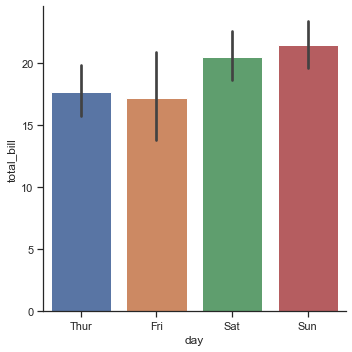

In [63]:
# estimate is mean by default
# error bars show the confidence interval (95% default)

sns.catplot(x="day", y="total_bill", kind="bar", data=tips);

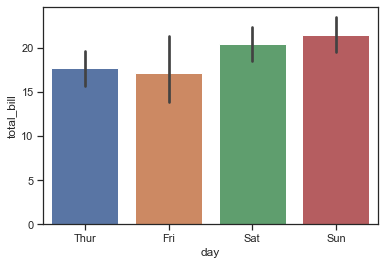

In [64]:
sns.barplot(x="day", y="total_bill", data=tips);

In [65]:
tips.groupby('day')['total_bill'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


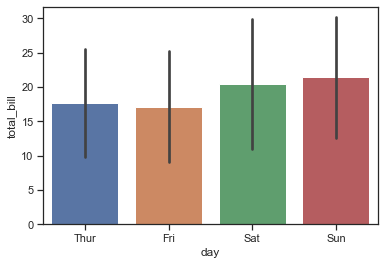

In [66]:
sns.barplot(x="day", y="total_bill", ci="sd", data=tips);

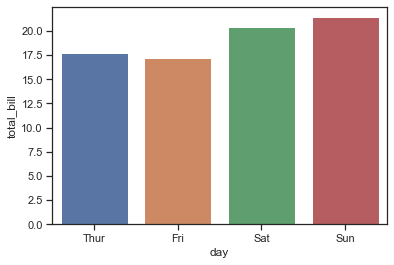

In [67]:
sns.barplot(x="day", y="total_bill", ci=None, data=tips);

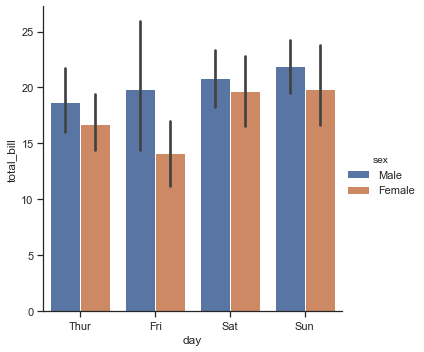

In [68]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="bar", data=tips);

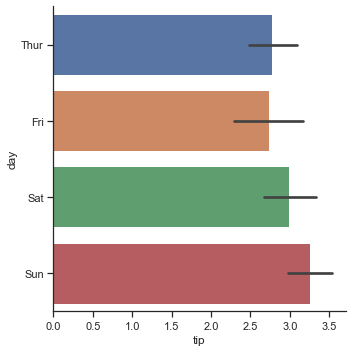

In [69]:
sns.catplot(x="tip", y="day", kind="bar", data=tips);

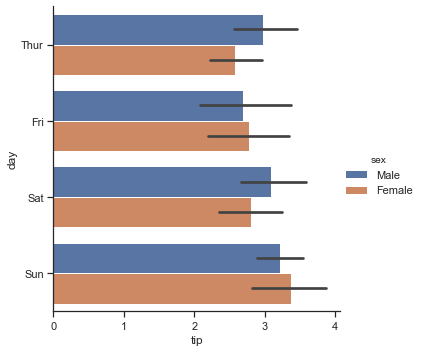

In [70]:
sns.catplot(x="tip", y="day", hue="sex", kind="bar", data=tips);

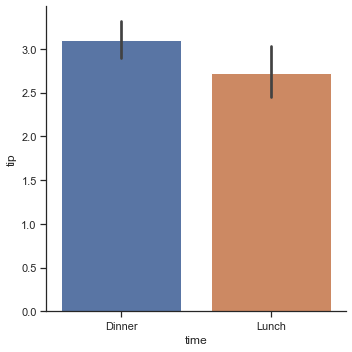

In [71]:
sns.catplot(x="time", y="tip", kind="bar", data=tips,
            order=["Dinner", "Lunch"]);

#### Count plot

In [56]:
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [57]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


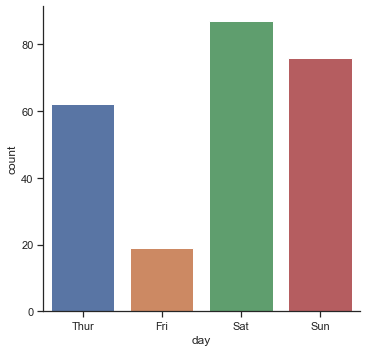

In [58]:
sns.catplot(x="day", kind="count", data=tips);

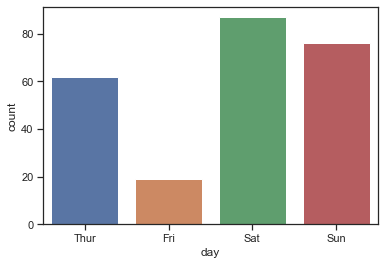

In [59]:
sns.countplot(x="day", data=tips);

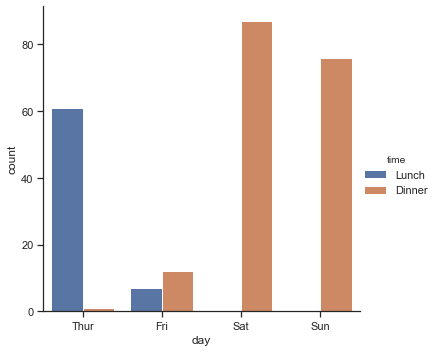

In [60]:
sns.catplot(x="day", kind="count", hue="time", data=tips);

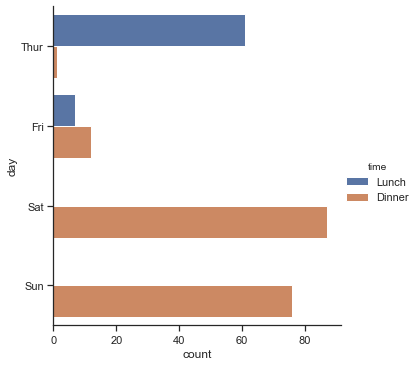

In [61]:
sns.catplot(y="day", kind="count", hue="time", data=tips);

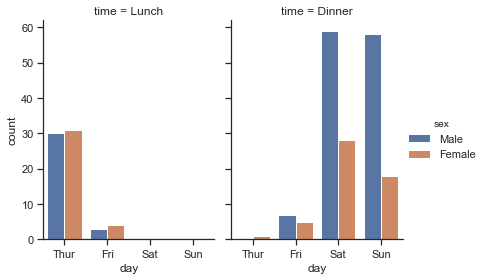

In [62]:
sns.catplot(x="day", kind="count", hue="sex", col="time", data=tips,
            height=4, aspect=.7);